# Species Tree reconstruction

In this example we will try to obtain 4 different species tree for phylome 15.

1. Duptree
2. Concatenation
3. Astral-PRO
4. SpeciesRax

First of all to import the functions do:

In [1]:
import os
os.chdir("..")

In [2]:
import analyse_phylome as ap
from ete3 import Tree, PhyloTree

In [4]:
# set useful variable
duptreePath = "/home/giacomo/master-thesis/Second_proj/obtain_phylome_data_scripts/duptree2"
outDir = "out_dir15"
treeFile = "test_data/best_trees15.txt"
duptreeFile = outDir + "/duptree_in.txt"
tagName = ""

ap.create_folder(outDir)

##### Duptree

Duptree is a super tree based method that has the advantage that it uses trees with duplications to infer the species tree that minimizes the number of inferred duplications according to reconciliation. It is one of the few programs you’ll find that returns a rooted tree. It will simpy need the best_trees file from PhylomeDB. 

obtain_duptree_file creates the input file for duptree. The gene-trees are simpy renamed with their species and you cand decide whether or not rooting them (midpoint=True)

In [5]:
help(ap.obtain_duptree_file)

ap.obtain_duptree_file(treeFile, duptreeFile) #midpoint=True

help(ap.launch_duptree)

ap.launch_duptree(duptreeFile, "out_dir15/sp_duptree.nwk", duptreePath, outDir, tagName)


Help on function obtain_duptree_file in module analyse_phylome.species:

obtain_duptree_file(treeFile, duptreeFile, midpoint=False)
    Prepare files for duptree.
    
    Parameters
    ----------
    treeFile : str
        best trees file from PhylomeDB
    duptreeFile : str
        File where the tress will be written
    midpoint: bool
        Midpoint root gene trees?
    
    Returns
    -------
    type
        File that will be the input of duptree

Creating duptree file
Help on function launch_duptree in module analyse_phylome.species:

launch_duptree(fileName, spTreeFile, duptreePath, outDir, tagName)
    Run duptree.
    
    Parameters
    ----------
    fileName : type
        file produced by obtain_duptree_file()
    spTreeFile : type
        Output species tree file
    duptreePath : str
        Path of duptree exe
    outDir : str
        output directory
    tagName : str
        tag
    
    Returns
    -------
    type
        Duptree species tree



##### Concatenation tree

To do this, follow the tutorial in examples/example_cat.py and obtain the concat aln. Then, apply the phylomizer pipeline to this alignment. The alignment may be very long so it could be very computationally demanding.

The reconstruction pipeline is stored somewhere in /gpfs/projects/bsc40. -s t means that only the tree building step will be done.

`python reconstruction_pipeline.py -s t -i concat_aln -o out_tree`


#### Astral-PRO

"ASTRAL-Pro stands for ASTRAL for PaRalogs and Orthologs. ASTRAL is a tool for estimating an unrooted species tree given a set of unrooted gene trees and is statistically consistent under the multi-species coalescent model (and thus is useful for handling incomplete lineage sorting, i.e., ILS). ASTRAL-pro extends ASTRAL to allow multi-copy genes. ASTRAL-pro finds the species tree that has the maximum number of shared induced quartet tree equivalent classes with the set of gene trees, subject to the constraint that the set of bipartitions in the species tree comes from a predefined set of bipartitions." (see [here](https://github.com/chaoszhang/A-pro))

Though I suggest to use the C++ version of the tool which can be found [here](https://github.com/chaoszhang/ASTER/tree/548fd31493397ec44f5c8e3452c689e547b3e271) which is faster and can handle much larger jobs.

The function simply rename the trees with the species name as gene name.

In [6]:
# simply rename the trees
ap.get_astral_pro_data(treeFile, "out_dir15/15_astral_trees.txt")

Once obtained the input trees to run astral-pro do:

`./astral_c/ASTER/astral-pro -o output_tree -u 1 -t threads best_trees_renamed.txt 2>&1 | tee apro.log`

Where -u stand for the level of verbosity. I suggest to redirect stdout to a logfile.

#### SpeciesRax

"SpeciesRax is part of the GeneRax tool and is available since GeneRax v2.0.0. SpeciesRax infers a rooted species tree from a set of unrooted gene trees." (see more [here](https://github.com/BenoitMorel/GeneRax)).

In order to run SpeciesRax need a family file where the tree file, the substition model and the mapping file between gene and species are explicited.

This function creates all of them. Note that to run SpeciesRax you don't need the alignment file.

In [7]:
# speciesrax
ap.get_generax_data(treeFile, "out_dir15/sprax_15")

Then once obtained the data generax can be run in the cluster like this:

To load it

`module purge
module load gcc impi generax`


`mpiexec -np cores generax --families family.txt --strategy SKIP --si-strategy HYBRID --species-tree [MiniNJ or another species tre like duptree] --rec-model UndatedDTL --per-family-rates --prune-species-tree --si-estimate-bl --si-quartet-support --prefix sprax`

### Species Tree rooting

you can use the json file stored in phylomed db with sp2age dict for most phylomes in order to root the species tree with the furthest sequence. In some cases, the furthest species from spe2age may be distributed in non monopyletic clades, thus rooting will be meaningless. In those cases the user may decide to do midpoint rooting `midpoint=True` or do specify a list of outgroups.

In [3]:
import json

with open('data/root_phy.json') as f:
    all_dicts = json.load(f)
    
phy_id = '15'
spe2age_stored = all_dicts[phy_id]

In [4]:
sptree_file = "./test_data/phylome_15_sp_duptree.txt"
sptree = Tree(sptree_file)
# sptree_rooted = ap.root_tree(sptree, spe2age_stored)
print(sptree)


                     /-SCLSC
                  /-|
                 |   \-BLUGR
               /-|
              |  |   /-GIBZE
              |   \-|
              |     |   /-NEUCR
              |      \-|
            /-|         \-SORMK
           |  |
           |  |      /-MYCGR
           |  |   /-|
           |  |  |   \-PHANO
           |   \-|
         /-|     |   /-COCIM
        |  |      \-|
        |  |        |   /-EMENI
        |  |         \-|
        |  |            \-NEOFI
        |  |
        |  |   /-ARTOA
      /-|   \-|
     |  |     |   /-TUBMM
     |  |      \-|
     |  |        |   /-341454
     |  |         \-|
     |  |            \-PYROM
   /-|  |
  |  |  |   /-YARLI
  |  |   \-|
  |  |      \-YEAST
  |  |
--|  |   /-SCHPO
  |   \-|
  |      \-TAPDE
  |
  |   /-AGABI
   \-|
      \-LACBI


In [5]:
rooted_sptree = ap.root_species_tree(sptree, spe2age_stored)
# Alterntively, you could set specific outgroups by passing a list:
# rooted_sptree = ap.root_species_tree(sptree, out_list=['NEUCR','PHANO'])
# or decide to midpoint root
# rooted_sptree = ap.root_species_tree(sptree, midpoint=True)
print(rooted_sptree)

there are more than one furthest sequence, the root will be the ancestor node that comprise all of them.
['AGABI', 'LACBI']

      /-AGABI
   /-|
  |   \-LACBI
  |
  |                  /-SCLSC
  |               /-|
  |              |   \-BLUGR
  |            /-|
  |           |  |   /-GIBZE
  |           |   \-|
  |           |     |   /-NEUCR
  |           |      \-|
  |         /-|         \-SORMK
  |        |  |
  |        |  |      /-MYCGR
  |        |  |   /-|
--|        |  |  |   \-PHANO
  |        |   \-|
  |      /-|     |   /-COCIM
  |     |  |      \-|
  |     |  |        |   /-EMENI
  |     |  |         \-|
  |     |  |            \-NEOFI
  |     |  |
  |     |  |   /-ARTOA
  |   /-|   \-|
  |  |  |     |   /-TUBMM
  |  |  |      \-|
  |  |  |        |   /-341454
  |  |  |         \-|
  |  |  |            \-PYROM
   \-|  |
     |  |   /-YARLI
     |   \-|
     |      \-YEAST
     |
     |   /-SCHPO
      \-|
         \-TAPDE


### Species tree Visualization

In order to visualize the species tree we want to traslate the mnemonic code to NCBI taxonomic id. To do this we can download the uniprot dataframe where mnemonic codes are transleted with:

`curl https://www.uniprot.org/docs/speclist.txt -o data/speclist_$(date +'%d_%m_%y').txt`

Or you can use phylome info file to get the dictionary.

In [6]:
speclist = "./data/speclist_24_08_21.txt"
phy_info = "./data/phylome_info15.txt"

In [7]:
tax_dict_u = ap.get_tax_dict_uniprot(rooted_sptree, speclist)
print(tax_dict_u)
# or with phylome_info
tax_dict_i = ap.get_tax_dict_info(phy_info)
print(tax_dict_i)

You may want to add it manually
{'AGABI': '5341', 'ARTOA': '756982', 'BLUGR': '34373', 'COCIM': '246410', 'EMENI': '227321', 'GIBZE': '229533', 'LACBI': '29883', 'NEOFI': '331117', 'NEUCR': '367110', 'PHANO': '321614', 'PYROM': '1076935', 'SCHPO': '284812', 'SCLSC': '5180', 'SORMK': '771870', 'TAPDE': '1097556', 'TUBMM': '656061', 'YARLI': '284591', 'YEAST': '559292', '341454': '341454'}
{'YEAST': '4932', 'YARLI': '4952', 'NEUCR': '5141', 'SCLSC': '5180', 'AGABI': '5341', 'COCIM': '5501', 'GIBZE': '5518', 'LACBI': '29883', 'BLUGR': '34373', 'EMENI': '162425', 'SCHPO': '284812', 'PHANO': '321614', 'NEOFI': '331117', '341454': '341454', 'TUBMM': '656061', 'ARTOA': '756982', 'SORMK': '771870', 'MYCGR': '1047171', 'PYROM': '1076935', 'TAPDE': '1097556'}


if a species is missing you'll be warned and you can add the voice manually searching in ncbi taxonomy and do:

`tax_dict["MYCGR"] = '1047171'`

Anyway, the missing keys will still be handled in the visualization.

Further we can get the taxonomic dataframe starting from this dictionary. By default, all rankable phyla (thus no phyla annotated with "clade" or "phyla") common to all species are taken. By setting set_cols=True we can try to get default columns which are \["species","genus","family","order","class","phylum","kingdom","superkingdom"\]. In this case, if a species does not have it it will be annotated with the closest more general term. We can use get_dataframe to get a more readable pandas df out of the dictionary.

In [8]:
whole_tax_dict_def = ap.get_taxonomic_df(tax_dict_i)
whole_tax_dict = ap.get_taxonomic_df(tax_dict_i, set_cols=True, fill=True)
ap.get_dataframe(whole_tax_dict_def).head()

,species,genus,order,class,subphylum,phylum,subkingdom,kingdom,superkingdom
0,Saccharomyces cerevisiae,Saccharomyces,Saccharomycetales,Saccharomycetes,Saccharomycotina,Ascomycota,Dikarya,Fungi,Eukaryota
1,Yarrowia lipolytica,Yarrowia,Saccharomycetales,Saccharomycetes,Saccharomycotina,Ascomycota,Dikarya,Fungi,Eukaryota
2,Neurospora crassa,Neurospora,Sordariales,Sordariomycetes,Pezizomycotina,Ascomycota,Dikarya,Fungi,Eukaryota
3,Sclerotinia sclerotiorum,Sclerotinia,Helotiales,Leotiomycetes,Pezizomycotina,Ascomycota,Dikarya,Fungi,Eukaryota
4,Agaricus bisporus,Agaricus,Agaricales,Agaricomycetes,Agaricomycotina,Basidiomycota,Dikarya,Fungi,Eukaryota


We can see that in the first case family is missing as not all species have it but there are subphylum and subkingdom present. With set_cols instead we can see the default columns. Only coccidioides had a missing family entry thus order Onygenales was taken instead. 

In [9]:
ap.get_dataframe(whole_tax_dict).head(10)

,species,genus,family,order,class,phylum,kingdom,superkingdom
0,Saccharomyces cerevisiae,Saccharomyces,Saccharomycetaceae,Saccharomycetales,Saccharomycetes,Ascomycota,Fungi,Eukaryota
1,Yarrowia lipolytica,Yarrowia,Dipodascaceae,Saccharomycetales,Saccharomycetes,Ascomycota,Fungi,Eukaryota
2,Neurospora crassa,Neurospora,Sordariaceae,Sordariales,Sordariomycetes,Ascomycota,Fungi,Eukaryota
3,Sclerotinia sclerotiorum,Sclerotinia,Sclerotiniaceae,Helotiales,Leotiomycetes,Ascomycota,Fungi,Eukaryota
4,Agaricus bisporus,Agaricus,Agaricaceae,Agaricales,Agaricomycetes,Basidiomycota,Fungi,Eukaryota
5,Coccidioides immitis,Coccidioides,Onygenales,Onygenales,Eurotiomycetes,Ascomycota,Fungi,Eukaryota
6,Fusarium graminearum,Fusarium,Nectriaceae,Hypocreales,Sordariomycetes,Ascomycota,Fungi,Eukaryota
7,Laccaria bicolor,Laccaria,Tricholomataceae,Agaricales,Agaricomycetes,Basidiomycota,Fungi,Eukaryota
8,Blumeria graminis,Blumeria,Erysiphaceae,Erysiphales,Leotiomycetes,Ascomycota,Fungi,Eukaryota
9,Aspergillus nidulans,Aspergillus,Aspergillaceae,Eurotiales,Eurotiomycetes,Ascomycota,Fungi,Eukaryota


In order to visualize the species tree we need to annotate each leaf with this information. Then we can wether visualize (show=True) or save the plot (show=False). Caution these functions do a copy (cpickle) of the starting tree thus the input tree won't have any taxonomic information assigned. We can also set circular=True to get the circular image.

In [21]:
taxo_sptree = ap.annotate_taxonomy(sptree, whole_tax_dict, tax_dict_i)
ap.viz_species_tree(taxo_sptree, show=False, render="./out_dir15/plot_sptree_standard.png")
ap.viz_species_tree(taxo_sptree, circular=True, show=False, render="./out_dir15/plot_sptree_standard_c.png")

By default viz_species_tree simply takes the species names and set it as leaf names. Like here:

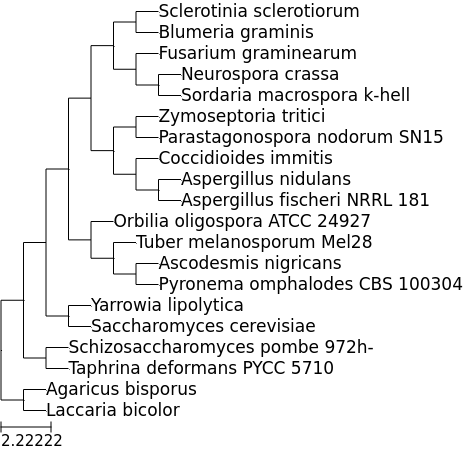

In [22]:
from IPython.display import Image
Image(filename='./out_dir15/plot_sptree_standard.png')

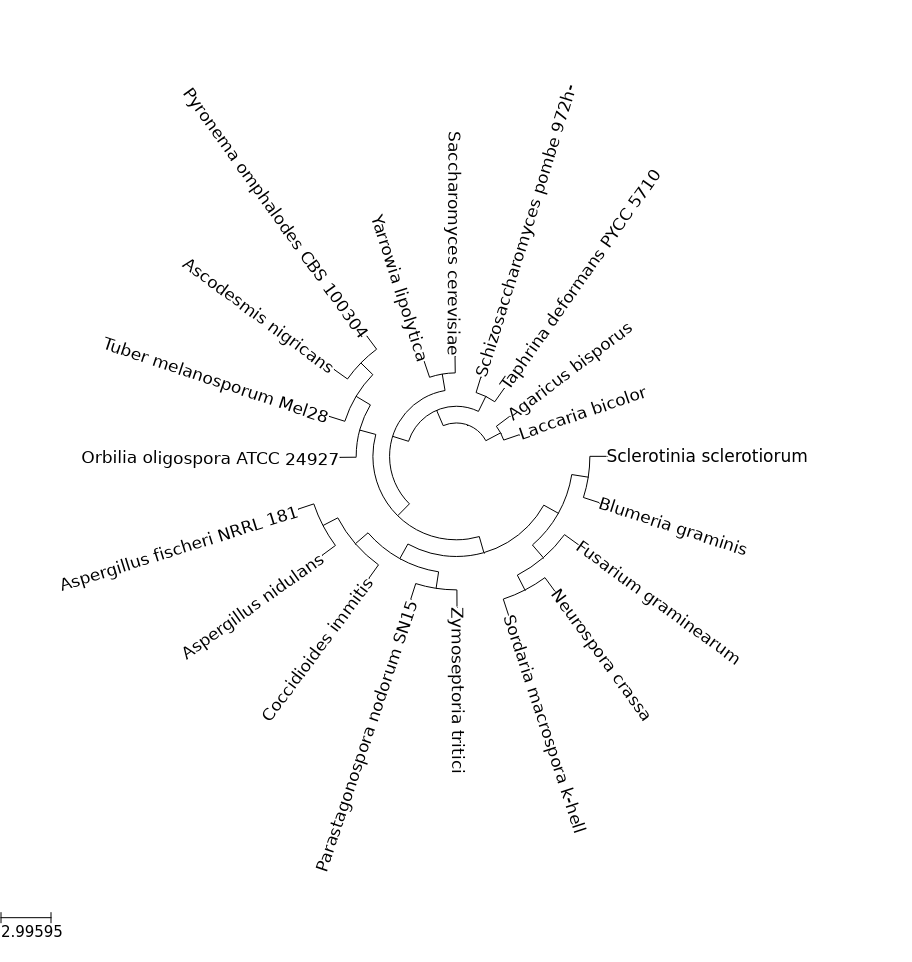

In [23]:
Image(filename='./out_dir15/plot_sptree_standard_c.png') 

Or we can either add the taxonomy as a table (taxonomy=True) to the right of the tree plot. Do not use it with circular layout as it will be very ugly.

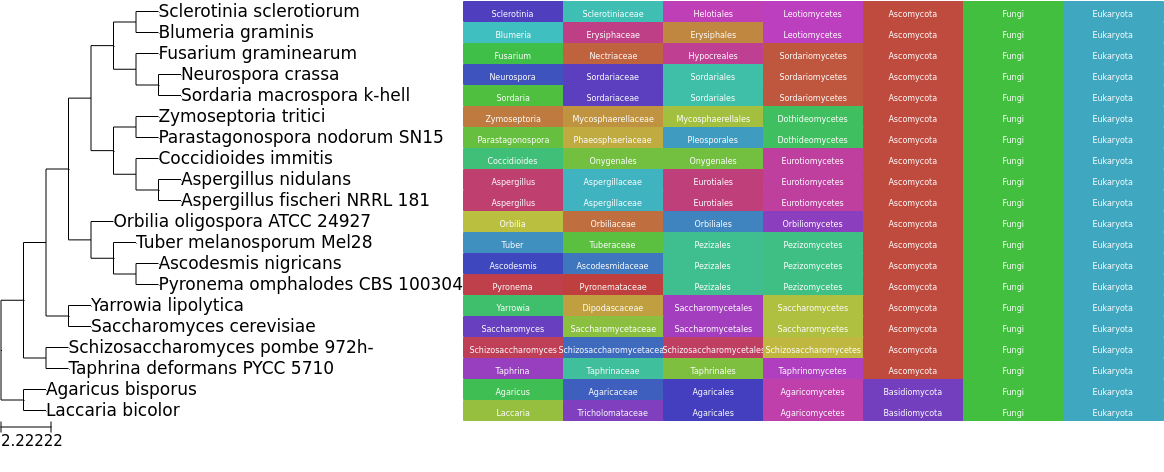

In [24]:
ap.viz_species_tree(taxo_sptree, taxonomy=True, show=False, render="./out_dir15/plot_sptree_taxo.png")
Image(filename='./out_dir15/plot_sptree_taxo.png') 

We can also do the "boxed" layout as currently implemented in phylomeDB. We can set the target number of different boxes we want (Default is 5) and the function will try to get the classes that split the species in the number closest to the target. This function will also output the legend. annotate_boxes will only work if the species tree is annotated with the taxonomy (thus, only the output from annotate_taxonomy must be used). I think that this layout works better when circular.


In [34]:
boxed_sptree, legend = ap.annotate_boxes(taxo_sptree, whole_tax_dict, target=10)

ap.viz_species_tree(boxed_sptree, legend=legend, circular=True, show=False, render="./out_dir15/plot_sptree_box.png")

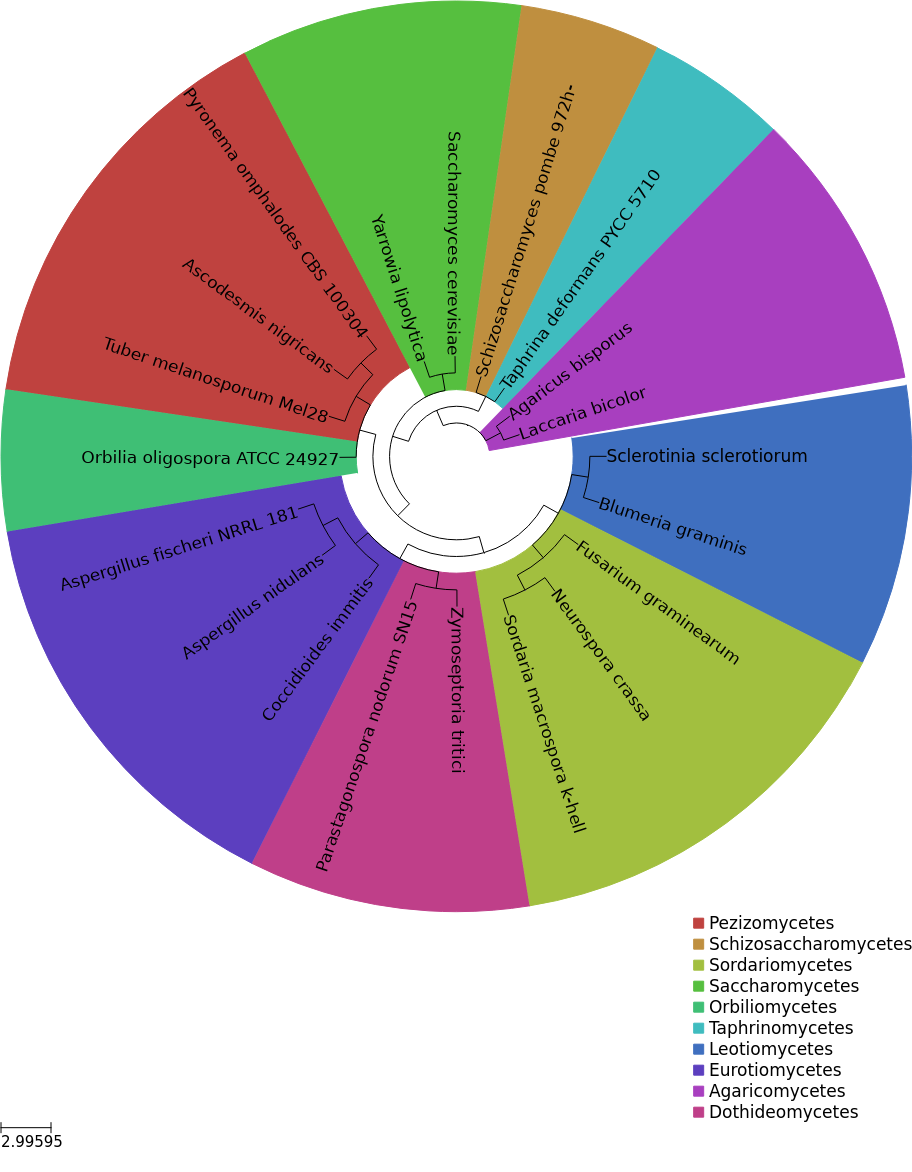

In [35]:
Image(filename='./out_dir15/plot_sptree_box.png') 